In [12]:
import numpy , random , math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt
import numpy as np

# Setting up Functions

In [81]:
#Linear kernel
def LinearKernel(x, y):
    
    return np.dot(x, y)

# Polynomial kernels
def PolyKernel(x, y):
    # The exponent p (a positive integer) controls the degree of the polynomials. 
    # p = 2 --> quadratic shapes (ellipses, parabolas, hyperbolas). 
    # p = 3 or higher --> more complex shapes.
    p = 5
    return np.power(np.dot(x, y) + 1, p)
    
def RBFKernel(x, y):
    # the parameter sigma is used to control the smoothness of the boundary
    sigma = 2
    return math.exp(-math.pow(numpy.linalg.norm(np.subtract(x, y)), 2)/(2 * math.pow(sigma,2)))

def objective(alpha):
    # find alpha that minimizes this 
    return (1/2)*np.dot(alpha, np.dot(alpha, Pmatrix)) - np.sum(alpha)

# np.dot between two 1D vectors computes a simple dot product (multiply each row with the other corresponding row and eventually summing for all rows)

# Higher value of α means that ith training example holds more importance as a support vector
def compute_b():
    # the indicator function for any support vector has a value equal to its target value, 
    # since we know that it is exactly on the margin
    
    for alpha, x, target in non_zero_values:
        if alpha < C:
            support_v = x
            target_support_v = target
    
    b_result = 0
    # only want points on the margin (corresponds to a point with an α-value larger than zero, but less than C)
    for alpha, x, target in non_zero_values:
        b_result += alpha*target*Kernel(support_v, x)
    
    return b_result - target_support_v


def zerofun(alpha):
    return numpy.dot(alpha, targets)

def indicator(point):
    
    indic_sum = 0
    
    for alpha, x, target in non_zero_values:
        indic_sum += alpha*target*Kernel(point, x)
        
    return indic_sum - b



# Generate Data

In [82]:
#Generate Data
num_points = 40

#Class A1
std_a1 = 0.9
x_a1 = -2.0
y_a1 = 0.0

#Class A2
std_a2 = 0.1
x_a2 = 0.0
y_a2 = -2.0

#Class A3
#std_a3 = 0.5
#x_a3 = 0.0
#y_a3 = -3.0

#Class B
std_b = 0.5
x_b = 0.0
y_b = 0.0

classA = np.concatenate((
    np.random.randn(int(num_points/2),2)*std_a1+[x_a1,y_a1], 
    np.random.randn(int(num_points/2),2)*std_a2+[x_a2,y_a2]#,
    #np.random.randn(int(num_points/3),2)*std_a2+[x_a3,y_a3]
))

classB = np.random.randn(num_points,2)*std_b+[x_b,y_b]

inputs = np.concatenate((classA, classB))

onesA = np.ones(classA.shape[0])
onesB = -np.ones(classB.shape[0])

targets = np.concatenate((onesA, onesB))

N = inputs.shape[0]

permute = list(range(N))

np.random.shuffle(permute)

inputs = inputs[permute, :]
targets = targets[permute]

# Main call to Minimize 

Success!
We have found support vectors with alpha, x and target values of:
  [(2.1907795679815583, array([ 0.00531619, -1.81071834]), 1.0), (9.999999999999092, array([-0.29489963, -1.18014016]), -1.0), (9.999999999999208, array([-0.91218301,  0.11501445]), -1.0), (9.999999999999504, array([ 0.03943073, -1.84428214]), 1.0), (9.999999999999162, array([-0.4091724 , -0.79463838]), 1.0), (9.999999999999176, array([-0.76585504, -0.04271805]), -1.0), (9.999999999999034, array([-1.19710562,  0.63372508]), 1.0), (9.999999999998995, array([-0.17470215, -0.60937854]), -1.0), (2.1907795679820232, array([-0.48036473,  0.04803272]), -1.0), (9.999999999999213, array([-0.57197669, -0.05589512]), -1.0), (9.99999999999908, array([-0.98471317,  0.50467762]), 1.0), (9.999999999999302, array([-0.45367573, -0.16887028]), -1.0), (9.999999999999243, array([-0.03422992, -0.95178266]), -1.0), (9.999999999999334, array([ 0.07405101, -1.77131989]), 1.0), (9.999999999999002, array([-0.71744901,  0.49804755]), 1.0)

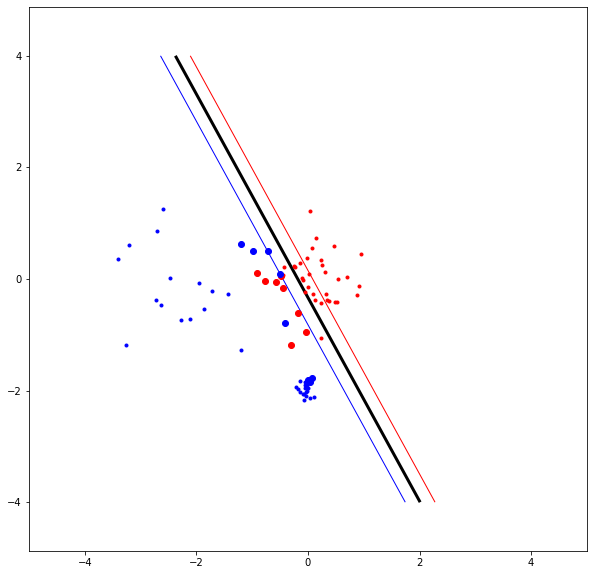

In [83]:
#Create empty start vector as initial guess of the alpha vector
start = np.zeros(N)

#Pre-compute the Pmatrix
Pmatrix = np.zeros((N,N))

#Choose which Kernel to use
Kernel = LinearKernel
#Kernel = RBFKernel
#Kernel = PolyKernel

for i in range(N):
    for j in range(N):
        Pmatrix[i][j] = targets[i]*targets[j]*Kernel(inputs[i], inputs[j])

#Choose Slack Variable 
C = 10

#Choose the bounds for alpha
#B = [(0, None) for b in range(N)] 
B = [(0, C) for b in range(N)] 

#Define the constraints
# eq = equality constraint &&& fun = function
XC = {'type':'eq', 'fun':zerofun} 

ret = minimize(objective, start, bounds=B, constraints=XC)
alpha = ret['x']

if ret.success:
    print("Success!")
else:
    print("The optimization didnt converge!")

# Remove 0's
non_zero_values = []
SVM = []
for i in range(len(alpha)):
    if alpha[i] > 10**(-5): #and alpha[i] < C
        non_zero_values.append((alpha[i], inputs[i], targets[i]))
        SVM.append(inputs[i])

if len(non_zero_values) > 0:
    print('We have found support vectors with alpha, x and target values of:\n ', non_zero_values)
else:
    print("There is no solution")
    
b = compute_b()

# Plot everything together
#indicator()

plt.figure(figsize=(10,10))
plt.plot((list(p[0] for p in classA)), list((p[1] for p in classA)), 'b.')
plt.plot((list(p[0] for p in classB)), list((p[1] for p in classB)), 'r.')

# PLot over the SVMs with Large Green Dots
for x in range(len(non_zero_values)):
    if non_zero_values[x][2] == 1.0:
        plt.plot((SVM[x][0]),(SVM[x][1]), 'bo')
    else: 
        plt.plot((SVM[x][0]),(SVM[x][1]), 'ro')
    
xgrid = np.linspace(-5,5) 
ygrid = np.linspace(-4,4)

grid = np.array([[indicator(np.array((x, y))) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))

plt.axis('equal') # Force same scale on both axes
plt.savefig('svmplot.pdf') # Save a copy in a file
plt.show()

In [84]:
non_zero_values


[(2.1907795679815583, array([ 0.00531619, -1.81071834]), 1.0),
 (9.999999999999092, array([-0.29489963, -1.18014016]), -1.0),
 (9.999999999999208, array([-0.91218301,  0.11501445]), -1.0),
 (9.999999999999504, array([ 0.03943073, -1.84428214]), 1.0),
 (9.999999999999162, array([-0.4091724 , -0.79463838]), 1.0),
 (9.999999999999176, array([-0.76585504, -0.04271805]), -1.0),
 (9.999999999999034, array([-1.19710562,  0.63372508]), 1.0),
 (9.999999999998995, array([-0.17470215, -0.60937854]), -1.0),
 (2.1907795679820232, array([-0.48036473,  0.04803272]), -1.0),
 (9.999999999999213, array([-0.57197669, -0.05589512]), -1.0),
 (9.99999999999908, array([-0.98471317,  0.50467762]), 1.0),
 (9.999999999999302, array([-0.45367573, -0.16887028]), -1.0),
 (9.999999999999243, array([-0.03422992, -0.95178266]), -1.0),
 (9.999999999999334, array([ 0.07405101, -1.77131989]), 1.0),
 (9.999999999999002, array([-0.71744901,  0.49804755]), 1.0),
 (9.999999999999034, array([-0.49390244,  0.08166362]), 1.0)]

**1. Move the clusters around and change their sizes to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the optimizer (minimize function) is not able to find a solution at all.**

2. Implement the two non-linear kernels. You should be able to clas- sify very hard data sets with these.
3. The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the bias- variance trade-off.
4. Explore the role of the slack parameter C. What happens for very large/small values?
5. Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model (kernel) and vice versa?